In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df=pd.read_csv('dataset/cleaned_data.csv',low_memory=False)

In [3]:
# apply association rule mining
df.isnull().sum()

BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
NewCreditCustomer                              0
VerificationType                               0
LanguageCode                                   0
Age                                            0
Gender                                         0
Country                                        0
AppliedAmount                                  0
Amount                                         0
Interest                                       0
LoanDuration                                   0
MonthlyPayment                                 0
Education                                      0
MaritalStatus                             335958
EmploymentStatus                          336134
EmploymentDurationCurrentEmployer              0
OccupationArea                            336053
HomeOwnershipType                              0
IncomeTotal         

In [4]:
df.isnull().sum()

BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
NewCreditCustomer                              0
VerificationType                               0
LanguageCode                                   0
Age                                            0
Gender                                         0
Country                                        0
AppliedAmount                                  0
Amount                                         0
Interest                                       0
LoanDuration                                   0
MonthlyPayment                                 0
Education                                      0
MaritalStatus                             335958
EmploymentStatus                          336134
EmploymentDurationCurrentEmployer              0
OccupationArea                            336053
HomeOwnershipType                              0
IncomeTotal         

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(36264, 38)

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.append('loanStatus')

In [8]:
numerical_cols = ['MonthlyPayment','AppliedAmount','Amount','IncomeTotal','PrincipalBalance','InterestAndPenaltyPaymentsMade','NoOfPreviousLoansBeforeLoan','ExistingLiabilities']
numerical_cols

['MonthlyPayment',
 'AppliedAmount',
 'Amount',
 'IncomeTotal',
 'PrincipalBalance',
 'InterestAndPenaltyPaymentsMade',
 'NoOfPreviousLoansBeforeLoan',
 'ExistingLiabilities']

In [9]:
Apriori_df = df[cat_cols]
Apriori_df[numerical_cols] = df[numerical_cols]

In [10]:
Apriori_df.isnull().sum()

VerificationType                     0
LanguageCode                         0
Gender                               0
Country                              0
Education                            0
MaritalStatus                        0
EmploymentStatus                     0
EmploymentDurationCurrentEmployer    0
OccupationArea                       0
HomeOwnershipType                    0
Rating                               0
CreditScoreEsMicroL                  0
YearMonth                            0
loanStatus                           0
MonthlyPayment                       0
AppliedAmount                        0
Amount                               0
IncomeTotal                          0
PrincipalBalance                     0
InterestAndPenaltyPaymentsMade       0
NoOfPreviousLoansBeforeLoan          0
ExistingLiabilities                  0
dtype: int64

In [11]:
Apriori_df['loanStatus'].replace({1:'defaulted', 0:'not defaulted'},inplace=True)

In [12]:
Apriori_df.head()

,VerificationType,LanguageCode,Gender,Country,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,CreditScoreEsMicroL,YearMonth,loanStatus,MonthlyPayment,AppliedAmount,Amount,IncomeTotal,PrincipalBalance,InterestAndPenaltyPaymentsMade,NoOfPreviousLoansBeforeLoan,ExistingLiabilities
3,Income and expenses verified,Estonian,Woman,Estonia,Secondary Education,Cohabitant,Retiree,MoreThan5Years,Other,Owner,C,M4,2016-05,defaulted,62.05,2125.0,2125.0,354.0,1381.59,1187.910,1.0,8.0
8,Income unverified,Estonian,Woman,Estonia,Higher education,Cohabitant,Entrepreneur,MoreThan5Years,Retail and wholesale,Owner,B,M5,2015-08,defaulted,84.75,3000.0,3000.0,900.0,1047.59,360.070,1.0,4.0
11,Income and expenses verified,Estonian,Male,Estonia,Secondary Education,Divorced,Entrepreneur,UpTo3Years,Transport and warehousing,Mortage,A,M6,2016-02,defaulted,268.57,9121.5,9100.0,1200.0,619.59,1620.385,0.0,7.0
14,Income verified,Spanish,Male,Spain,Basic education,Married,Fully employed,UpTo5Years,Other,Living with parents,F,M3,2015-05,defaulted,63.53,1500.0,1500.0,863.0,2099.77,355.920,0.0,1.0
17,Income and expenses verified,Spanish,Woman,Spain,Secondary Education,Divorced,Retiree,UpTo1Year,Other,"Tenant, pre-furnished property",HR,M5,2016-02,defaulted,101.19,1595.0,1090.0,697.0,2128.58,0.000,0.0,5.0


In [13]:
# apply assosiation rule mining

# convert data into list of lists
df_lists = Apriori_df.values.tolist()

records = []
for record in df_lists:
    records.append(list(filter(lambda a: a != 0, record)))
    
# Convert all values to string
records = [[str(item) for item in record] for record in records]
    

In [14]:
# Initialize TransactionEncoder
te = TransactionEncoder()

# Transform the data into an array
te_ary = te.fit(records).transform(records)

# Convert the array into a dataframe
df = pd.DataFrame(te_ary, columns=te.columns_) 

In [15]:
df.shape

(36264, 49093)

In [16]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)   

In [25]:
# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

rules_defaulted = rules[rules['consequents'].apply(lambda x: 'defaulted' in str(x))]
rules_not_defaulted = rules[rules['consequents'].apply(lambda x: 'not defaulted' in str(x))]


In [26]:
sorted_by_support = rules_defaulted.sort_values(by="support", ascending=False)
print(sorted_by_support.head(20).to_string())

                             antecedents                               consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
102                     (Fully employed)                               (defaulted)            0.828066            0.554186  0.453259    0.547371  0.987703 -0.005643    0.984943      -0.067525
56                             (Estonia)                           (not defaulted)            0.610247            0.445814  0.348748    0.571487  1.281895  0.076691    1.293276       0.564216
69                            (Estonian)                           (not defaulted)            0.525811            0.445814  0.308019    0.585798  1.313997  0.073605    1.337961       0.503940
296                            (Estonia)                 (Estonian, not defaulted)            0.610247            0.308019  0.305647    0.500859  1.626064  0.117680    1.386343       0.987852
292                  (Estonian, Estonia)

In [27]:
sorted_by_confidence = rules_defaulted.sort_values(by="confidence", ascending=False)
print(sorted_by_confidence.head(20).to_string(index=False))

                                antecedents              consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                                (HR, Spain)              (defaulted)            0.155306            0.554186 0.123015    0.792081 1.429269  0.036946    2.144171       0.355563
                       (HR, Spain, Spanish)              (defaulted)            0.153844            0.554186 0.121829    0.791898 1.428939  0.036571    2.142288       0.354758
                              (HR, Spanish)       (Spain, defaulted)            0.153844            0.157953 0.121829    0.791898 5.013512  0.097529    4.046323       0.946089
                              (HR, Spanish)              (defaulted)            0.153844            0.554186 0.121829    0.791898 1.428939  0.036571    2.142288       0.354758
                                (HR, Spain)     (Spanish, defaulted)            0.155306            0.156602 0.121829   

In [28]:
sorted_by_lift = rules_defaulted.sort_values(by="lift", ascending=False)
print(sorted_by_lift.head(20).to_string(index=False))

                 antecedents                          consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                   (Finnish)                 (defaulted, Finland)            0.171492            0.127344 0.123980    0.722946 5.677113  0.102141    3.149767       0.994383
                   (Finland)                 (Finnish, defaulted)            0.177614            0.124145 0.123980    0.698028 5.622678  0.101930    2.900453       0.999712
               (HR, Spanish)                   (Spain, defaulted)            0.153844            0.157953 0.121829    0.791898 5.013512  0.097529    4.046323       0.946089
                 (HR, Spain)                 (Spanish, defaulted)            0.155306            0.156602 0.121829    0.784446 5.009183  0.097508    3.912702       0.947522
                     (Spain) (Fully employed, Spanish, defaulted)            0.204032            0.119623 0.119623    0.586295 4.901203

In [29]:
sorted_by_leverage = rules_defaulted.sort_values(by="leverage", ascending=False)
print(sorted_by_leverage.head(20).to_string(index=False))

               antecedents                              consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                   (Spain)                     (Spanish, defaulted)            0.204032            0.156602 0.156602    0.767536 4.901203  0.124650    3.628084       1.000000
                 (Spanish)                       (Spain, defaulted)            0.202405            0.157953 0.156602    0.773706 4.898335  0.124631    3.721027       0.997810
                (Estonian)                 (not defaulted, Estonia)            0.525811            0.348748 0.305647    0.581288 1.666785  0.122272    1.555370       0.843635
                 (Estonia)                (Estonian, not defaulted)            0.610247            0.308019 0.305647    0.500859 1.626064  0.117680    1.386343       0.987852
                (Estonian) (Fully employed, not defaulted, Estonia)            0.525811            0.299084 0.264670    0.503

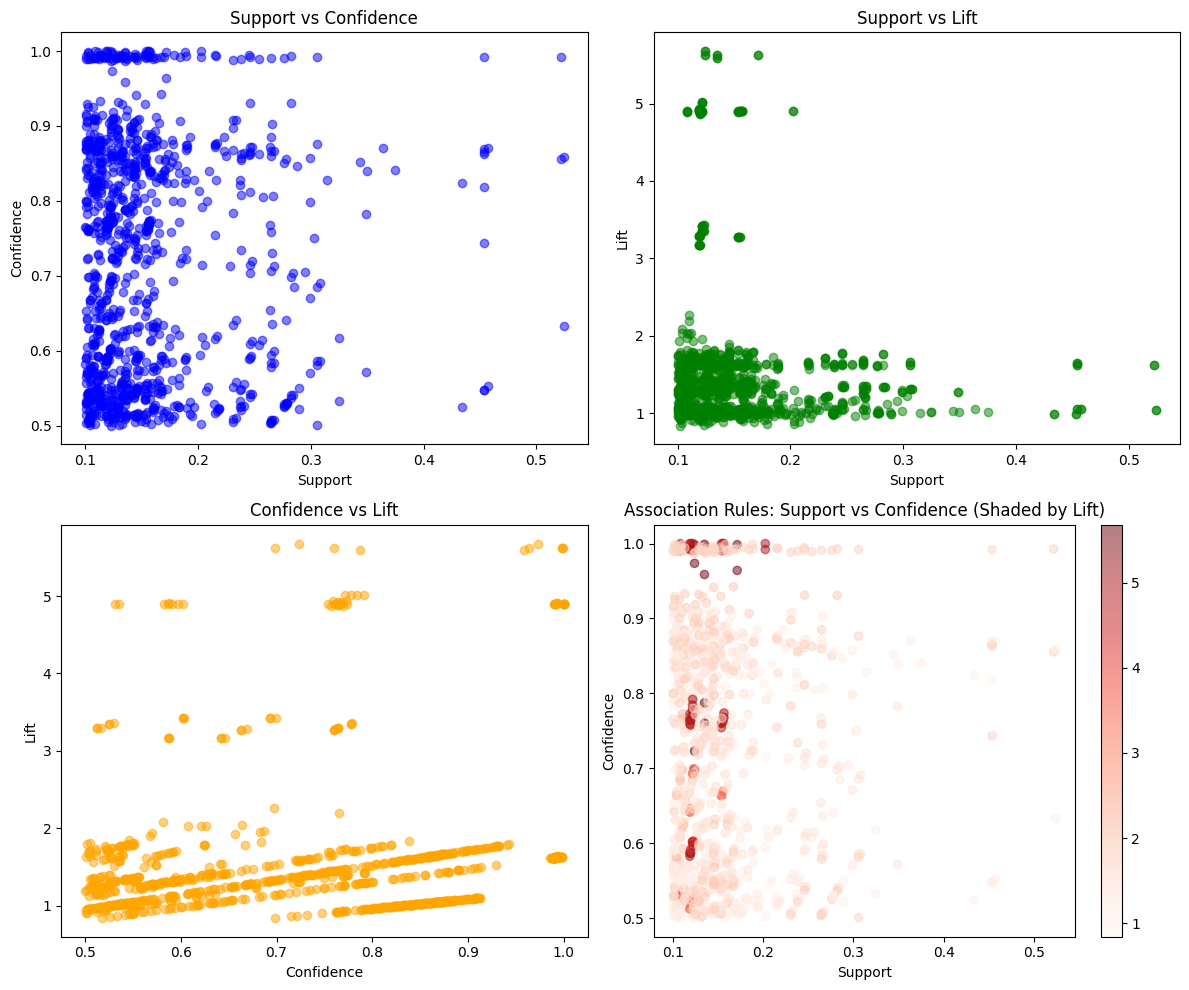

In [30]:
import matplotlib.pyplot as plt

# Define figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot support vs. confidence
axs[0, 0].scatter(rules['support'], rules['confidence'], c='blue', alpha=0.5)
axs[0, 0].set_xlabel('Support')
axs[0, 0].set_ylabel('Confidence')
axs[0, 0].set_title('Support vs Confidence')

# Plot support vs. lift
axs[0, 1].scatter(rules['support'], rules['lift'], c='green', alpha=0.5)
axs[0, 1].set_xlabel('Support')
axs[0, 1].set_ylabel('Lift')
axs[0, 1].set_title('Support vs Lift')

# Plot confidence vs. lift
axs[1, 0].scatter(rules['confidence'], rules['lift'], c='orange', alpha=0.5)
axs[1, 0].set_xlabel('Confidence')
axs[1, 0].set_ylabel('Lift')
axs[1, 0].set_title('Confidence vs Lift')

# Plot support vs. confidence with shading as lift
sc = axs[1, 1].scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='Reds', alpha=0.5)
axs[1, 1].set_xlabel('Support')
axs[1, 1].set_ylabel('Confidence')
axs[1, 1].set_title('Association Rules: Support vs Confidence (Shaded by Lift)')
fig.colorbar(sc, ax=axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_association_rules(rules,figsize=(12, 12)):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges for each association rule
    for rule in rules:
        antecedent = ", ".join(rule[0])
        consequent = ", ".join(rule[1])
        support = rule[2]
        confidence = rule[3]
        lift = rule[4]

        # Add nodes for antecedent and consequent
        G.add_node(antecedent)
        G.add_node(consequent)

        # Add edge between antecedent and consequent
        G.add_edge(antecedent, consequent, label=f"Support: {support:.2f}\nConfidence: {confidence:.2f}\nLift: {lift:.2f}")
        


    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=10, node_color="skyblue" if confidence > 0.5 else "red", font_size=10, font_weight="bold")
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red',font_size=5)
    
    # increase figure size
    plt.gcf().set_size_inches(figsize)

    # Show plot
    plt.show()


## from assosiation rules we can determine that being a spainish and have high risk rate then most probable your lone will be defaulted if you are in spain

In [24]:
# save appriori dataframe as assosiation dataset
Apriori_df.to_csv('dataset/Assisiation.csv',index=False)